In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
df = pd.read_json("stat_teams_byone_43_394_42_19_2017-01-01_2019-03-26.json")  # lendo json já salvo
plt.style.use('ggplot')

In [3]:
df

,data
code,stat_teams
columns,"[{'column': [{'name': 'match_id', 'fk': 'y', '..."
match,"[{'id': '939952', 'team': [{'id': '394', 'name..."


In [4]:
indexes = [df['data']['match'][i]['id'] for i in range(38)]

In [5]:
matches_list = []  # criando uma lista para receber os dados de cada partida
for match in df['data']['match']: 
    matches_list.append(pd.DataFrame(match['team'][0]['param']))

In [6]:
len(matches_list) # numero de partidas

38

In [7]:
matches_list[0][matches_list[0]['name'] == 'Goals conceded'] # dados da primeira partida

,id,name,t1,t2,t3,t4,t5,t6,t7,t8,...,z2c,z2l,z2r,z3c,z3l,z3r,z4b,z4c,z4l,z4r
0,-19,Goals conceded,1,NaN,1,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
matches_list[0]['name'].unique() # possibilidades

array(['Goals conceded', 'Ball possession >45 sec - number - number',
       'Ball possession 15-45 sec - number - number',
       'Ball possession 5-15 sec - number - number',
       'Ball possession <5 sec - number - number',
       'Ball possession - Average time of ball poss.',
       'Ball possession, quantity', 'Air challenges / won - defensive',
       'Ground challenges / won - defensive',
       'Air challenges / won - attacking',
       'Ground challenges / won - attacking', 'Aerial duels - defensive',
       'Ground challenges - defensive', 'Aerial duels - attacking',
       'Ground challenges - attacking', "Opponent's ball possession, sec",
       'Ball possession, sec', 'Ball possession, %', 'Passes accurate',
       'Passes', 'Total actions', 'Won challenges', 'Attacking passes',
       'Fouls', 'Non-attacking passes', 'Air challenges / won',
       'Throw-ins', 'Pass interceptions', 'Bad ball controls',
       'Fouls - Opponent', 'Tackles successful', 'Goalkeeper saves',

In [9]:
def get_features_dataframe(matches_list, feature):
    rows = [match[match['name'] == feature] for match in matches_list]
    return pd.concat(rows, ignore_index=True)
        

In [10]:
df_goals_conceded = get_features_dataframe(matches_list, 'Goals conceded')

In [11]:
len(df_goals_conceded)

28

In [12]:
df_goals_conceded

,id,name,t1,t2,t3,t4,t5,t6,t7,t8,...,z2c,z2l,z2r,z3c,z3l,z3r,z4b,z4c,z4l,z4r
0,-19,Goals conceded,1,NaN,1,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-19,Goals conceded,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-19,Goals conceded,NaN,NaN,NaN,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-19,Goals conceded,NaN,NaN,1,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-19,Goals conceded,1,NaN,1,1,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-19,Goals conceded,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-19,Goals conceded,NaN,1,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-19,Goals conceded,1,NaN,1,NaN,1,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-19,Goals conceded,NaN,NaN,NaN,NaN,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-19,Goals conceded,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_goals_conceded = df_goals_conceded.drop(['id','name'], axis=1)

In [14]:
df_goals_conceded

,t1,t2,t3,t4,t5,t6,t7,t8,t9,ts,...,z2c,z2l,z2r,z3c,z3l,z3r,z4b,z4c,z4l,z4r
0,1,NaN,1,1,NaN,1,NaN,NaN,NaN,2017-05-15 11:06:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2017-05-22 12:24:55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,2017-05-28 16:14:59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,2017-06-06 12:13:39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,1,1,NaN,2,NaN,NaN,NaN,2017-06-08 14:43:48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,2017-06-11 15:40:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,2017-06-15 18:02:13,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN,2017-06-22 23:43:16,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,2017-07-03 14:17:29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2017-07-09 14:55:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_goals_conceded[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9']]

,t1,t2,t3,t4,t5,t6,t7,t8,t9
0,1,NaN,1,1,NaN,1,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
3,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN
4,1,NaN,1,1,NaN,2,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
6,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN
7,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [16]:
df_goals_conceded_time = df_goals_conceded[['t1', 't2', 't3', 't4', 't5', 't6']].astype(float)

In [17]:
df_goals_conceded_time.sum()

t1     5.0
t2     5.0
t3     6.0
t4     5.0
t5    14.0
t6    12.0
dtype: float64

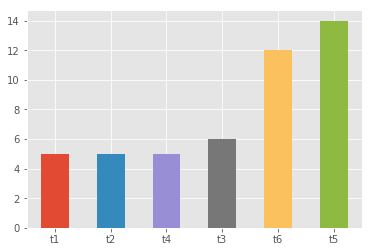

In [18]:
df_goals_conceded_time.sum().sort_values().plot.bar(rot=0)

In [19]:
df_goals_conceded_time_perc = df_goals_conceded_time.sum() / df_goals_conceded_time.sum().sum()

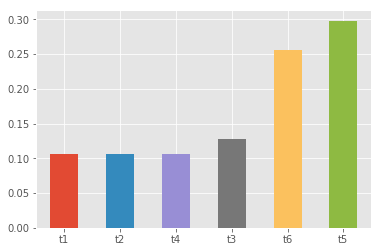

In [20]:
df_goals_conceded_time_perc.sort_values().plot.bar(rot=0)

In [21]:
df_goals_conceded_zone = df_goals_conceded[['z1b', 'z1c', 'z1l', 'z1r', 'z2c', 'z2l', 'z2r', 'z3c', 'z3l', 'z3r',
       'z4b', 'z4c', 'z4l', 'z4r']].astype(float)

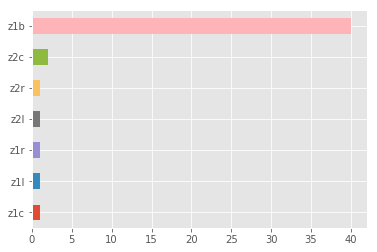

In [22]:
df_goals_conceded_zone = df_goals_conceded_zone.dropna(axis=1, how='all')
df_goals_conceded_zone.sum().sort_values().plot.barh()